<a href="https://colab.research.google.com/github/AlisaKri/DeepChemScripts/blob/master/RUL_estimation_with_simple_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
import numpy as np
import pandas as pd

In [184]:
data = pd.read_csv('train_rul.csv',sep=",")

In [185]:
#check no garbage in RUL
for index, row in data.iterrows():
  if data.at[index, 'RUL'] < 0:
    print(index)
    print(data.at[index, 'RUL'])

In [186]:
min(RUL)

128.0

In [4]:
data.columns

Index(['Unnamed: 0', 'Engine', 'Cycle', ' Setting 1', 'Setting 2', 'Setting 3',
       'Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5', 'Sensor 6',
       'Sensor 7', 'Sensor 8', 'Sensor 9', 'Sensor 10', 'Sensor 11',
       'Sensor 12', 'Sensor 13', 'Sensor 14', 'Sensor 15', 'Sensor 16',
       'Sensor 17', 'Sensor 18', 'Sensor 19', 'Sensor 20', 'Sensor 21', 'RUL'],
      dtype='object')

In [10]:
data

,Unnamed: 0,Engine,Cycle,Setting 1,Setting 2,Setting 3,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,Sensor 11,Sensor 12,Sensor 13,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21,RUL
0,0,1,1,10.0047,0.2501,20,489.05,604.13,1499.45,1309.95,10.52,15.49,394.88,2318.87,8770.20,1.26,45.40,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.00,28.58,17.1735,130.0
1,1,1,2,0.0015,0.0003,100,518.67,642.13,1584.55,1403.96,14.62,21.61,553.67,2388.01,9045.76,1.30,47.29,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.00,38.99,23.3619,130.0
2,2,1,3,34.9986,0.8401,60,449.44,555.42,1368.17,1122.49,5.48,8.00,194.93,2222.86,8343.91,1.02,41.92,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.00,14.83,8.8555,130.0
3,3,1,4,20.0031,0.7005,0,491.19,607.03,1488.44,1249.18,9.35,13.65,334.82,2323.85,8721.53,1.08,44.26,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.00,24.42,14.7832,130.0
4,4,1,5,42.0041,0.8405,40,445.00,549.52,1354.48,1124.32,3.91,5.71,138.24,2211.80,8314.56,1.02,41.79,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.00,10.99,6.4025,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45913,45913,218,129,42.0066,0.8400,40,445.00,551.02,1365.27,1147.43,3.91,5.72,137.97,2211.33,8303.20,1.02,42.68,130.21,2387.39,8062.87,9.4672,0.02,333,2212,100.00,10.57,6.2985,4.0
45914,45914,218,130,42.0029,0.8415,40,445.00,550.07,1365.55,1142.21,3.91,5.71,137.56,2211.29,8302.69,1.02,42.62,130.24,2387.28,8062.05,9.4619,0.02,332,2212,100.00,10.40,6.2741,3.0
45915,45915,218,131,41.9999,0.8400,40,445.00,549.92,1359.21,1150.15,3.91,5.72,138.05,2211.24,8309.41,1.02,42.83,129.86,2387.33,8062.73,9.4827,0.02,334,2212,100.00,10.37,6.1978,2.0
45916,45916,218,132,35.0007,0.8419,60,449.44,556.55,1380.05,1145.49,5.48,8.00,194.59,2222.54,8330.67,1.02,42.61,182.03,2387.56,8043.21,9.4212,0.02,337,2223,100.00,14.70,8.6761,1.0


In [187]:
#build the RUL list
engine_old = 1
cycle_old = 1
RUL = []
for index, row in data.iterrows():
  engine = row['Engine']
  cycle = row['Cycle']
  if engine > engine_old :
    RUL.append(cycle_old)
    engine_old = engine
    cycle_old = cycle
  else:
    cycle_old = cycle
#add the last cycle to RUL
RUL.append(data['Cycle'].iloc[-1])





In [188]:
print(RUL)

[223.0, 164.0, 150.0, 159.0, 357.0, 225.0, 168.0, 276.0, 181.0, 228.0, 210.0, 242.0, 210.0, 147.0, 178.0, 172.0, 228.0, 196.0, 167.0, 154.0, 205.0, 203.0, 213.0, 191.0, 281.0, 210.0, 178.0, 278.0, 228.0, 200.0, 283.0, 193.0, 286.0, 286.0, 188.0, 147.0, 177.0, 287.0, 161.0, 187.0, 201.0, 241.0, 209.0, 233.0, 242.0, 277.0, 227.0, 227.0, 285.0, 223.0, 182.0, 212.0, 259.0, 249.0, 147.0, 162.0, 150.0, 147.0, 169.0, 300.0, 229.0, 238.0, 254.0, 154.0, 209.0, 190.0, 145.0, 204.0, 170.0, 175.0, 225.0, 235.0, 249.0, 192.0, 186.0, 128.0, 174.0, 228.0, 225.0, 284.0, 199.0, 223.0, 231.0, 206.0, 246.0, 205.0, 177.0, 134.0, 225.0, 190.0, 199.0, 207.0, 222.0, 209.0, 234.0, 339.0, 157.0, 206.0, 263.0, 213.0, 226.0, 222.0, 243.0, 178.0, 149.0, 189.0, 200.0, 230.0, 160.0, 277.0, 227.0, 226.0, 160.0, 197.0, 260.0, 232.0, 212.0, 188.0, 242.0, 170.0, 153.0, 237.0, 254.0, 197.0, 245.0, 241.0, 163.0, 159.0, 147.0, 143.0, 263.0, 199.0, 151.0, 173.0, 188.0, 232.0, 237.0, 181.0, 211.0, 210.0, 277.0, 215.0, 149.0

In [189]:
list_of_columns = []
for j in range(6,27):
  list_of_columns.append(data.columns[j])


In [190]:
print(list_of_columns)

['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5', 'Sensor 6', 'Sensor 7', 'Sensor 8', 'Sensor 9', 'Sensor 10', 'Sensor 11', 'Sensor 12', 'Sensor 13', 'Sensor 14', 'Sensor 15', 'Sensor 16', 'Sensor 17', 'Sensor 18', 'Sensor 19', 'Sensor 20', 'Sensor 21']


Let's try a simple network that learns in each step RUL from all the features

In [191]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers import InputLayer
from keras.layers import SimpleRNN
from keras.layers import TimeDistributed

(45918, 28)

In [192]:
#load dataset
from numpy import loadtxt
dataset = data.to_numpy()
X = dataset[:,2:27]
Y = dataset[:,27]

In [286]:
#let's normalize this thing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(X)
#print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
# normalize the dataset and print
Xn = scaler.transform(X)
print(Xn)
# inverse transform and print
#inversed = scaler.inverse_transform(normalized)
#print(inversed)

[[-1.         -0.52367644 -0.40593824 ...  1.          0.26116838
   0.2651126 ]
 [-0.99438202 -0.99992859 -0.99928741 ...  1.          0.9766323
   0.97382028]
 [-0.98876404  0.66628261  0.99548694 ...  1.         -0.6838488
  -0.68748103]
 ...
 [-0.26966292  0.99961436  0.99524941 ...  1.         -0.99037801
  -0.99184604]
 [-0.26404494  0.66638259  0.99976247 ...  1.         -0.69278351
  -0.70802627]
 [-0.25842697  0.19058751  0.47648456 ... -1.         -0.72783505
  -0.72681932]]


In [287]:
Xn.shape

(45918, 25)

In [322]:
print(Y)

[130. 130. 130. ...   2.   1.   0.]


In [323]:
#need to reshape X into 3D: engine x cycle x sensor
#for fist step, keep it symmetrical and use the lowest number of cycles in dataset
#Y then becomes 
X_new=np.empty(shape=(218,126,25))
Y_new = np.empty(shape=(218,126))
#i would be number of engines
counter = 0
for i in range(0,218):
  #print('i=',i)
  # j would be number of cycles
  for j in range(0,126):
    #print('j=',j)
    #k would be number of sensors
    for k in range(0,25):
      #print('k=',k)
      #print('counter',counter)
      X_new[i,j,k]=Xn[counter,k]
      Y_new[i,j] = Y[counter]
    ##calculate step
    margin = int((RUL[i]-126)/2)

    
    if (j == 0):
      counter0 = counter
      counter = counter0 +  margin
    elif (j == 125):
      counter = counter0 + int(RUL[i])  
    else: 
      counter = counter + 1

In [324]:
X_new.shape

(218, 126, 25)

In [325]:
X_new[0,:,0]

array([-1.        , -0.73033708, -0.7247191 , -0.71910112, -0.71348315,
       -0.70786517, -0.70224719, -0.69662921, -0.69101124, -0.68539326,
       -0.67977528, -0.6741573 , -0.66853933, -0.66292135, -0.65730337,
       -0.65168539, -0.64606742, -0.64044944, -0.63483146, -0.62921348,
       -0.62359551, -0.61797753, -0.61235955, -0.60674157, -0.6011236 ,
       -0.59550562, -0.58988764, -0.58426966, -0.57865169, -0.57303371,
       -0.56741573, -0.56179775, -0.55617978, -0.5505618 , -0.54494382,
       -0.53932584, -0.53370787, -0.52808989, -0.52247191, -0.51685393,
       -0.51123596, -0.50561798, -0.5       , -0.49438202, -0.48876404,
       -0.48314607, -0.47752809, -0.47191011, -0.46629213, -0.46067416,
       -0.45505618, -0.4494382 , -0.44382022, -0.43820225, -0.43258427,
       -0.42696629, -0.42134831, -0.41573034, -0.41011236, -0.40449438,
       -0.3988764 , -0.39325843, -0.38764045, -0.38202247, -0.37640449,
       -0.37078652, -0.36516854, -0.35955056, -0.35393258, -0.34

In [293]:
Y_new.shape

(218, 126)

In [326]:
print(Y_new[0])

[130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130.
 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130.
 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130.
 130. 130. 130. 130. 129. 128. 127. 126. 125. 124. 123. 122. 121. 120.
 119. 118. 117. 116. 115. 114. 113. 112. 111. 110. 109. 108. 107. 106.
 105. 104. 103. 102. 101. 100.  99.  98.  97.  96.  95.  94.  93.  92.
  91.  90.  89.  88.  87.  86.  85.  84.  83.  82.  81.  80.  79.  78.
  77.  76.  75.  74.  73.  72.  71.  70.  69.  68.  67.  66.  65.  64.
  63.  62.  61.  60.  59.  58.  57.  56.  55.  54.  53.  52.  51.  50.]


In [75]:
x = np.array([[1,1,2,3],[1,2,4,5],[2,1,2,3],[2,2,4,6]])

In [76]:
print(x)

[[1 1 2 3]
 [1 2 4 5]
 [2 1 2 3]
 [2 2 4 6]]


In [65]:
np.shape(x)

(4, 4)

In [ ]:
b=np.empty(shape=(2,2,3))
#i would be number of engines
counter = 0
for i in range(0,2):
  print('i=',i)
  # j would be number of cycles
  for j in range(0,2):
    print('j=',j)
    #k would be number of sensors
    for k in range(0,3):
      print('k=',k)
      print('counter',counter)
      b[i,j,k]=x[counter,k+1]
    counter = counter + 1

In [78]:
np.shape(b)

(2, 2, 3)

In [90]:
print(b)

[[[1. 2. 3.]
  [2. 4. 5.]]

 [[1. 2. 3.]
  [2. 4. 6.]]]


In [327]:
 from sklearn.model_selection import train_test_split
#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_new, Y_new, test_size=0.33)

In [239]:
X_train.shape

(146, 126, 25)

In [328]:
#let's try to make it classification and make a one-hot encoding of the RUL between 0 and 130:
from keras.utils.np_utils import to_categorical
RUL_tags = to_categorical(y_train,131)


In [329]:
X_train.shape[2]

25

In [241]:
RUL_tags.shape

(146, 126, 131)

In [332]:
#build model
time_steps = 126
model = Sequential()
model.add(InputLayer(input_shape=(time_steps,25)))
model.add(SimpleRNN(64,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
#model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))


#add top layer that predicts the RUL distribution


#stepwise_dense = Dense(131,activation='softmax')
#stepwise_dense = TimeDistributed(stepwise_dense)
#model.add(stepwise_dense)
model.add(Dense(131,activation='softmax'))
#model.add(Dense(32,activation='relu'))
#model.add(Dense(1,activation='linear'))

In [333]:
model.compile('adam','categorical_crossentropy')


In [334]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_22 (SimpleRNN)    (None, 126, 64)           5760      
_________________________________________________________________
simple_rnn_23 (SimpleRNN)    (None, 126, 32)           3104      
_________________________________________________________________
dense_11 (Dense)             (None, 126, 131)          4323      
Total params: 13,187
Trainable params: 13,187
Non-trainable params: 0
_________________________________________________________________


In [340]:
model.fit(X_train,RUL_tags,batch_size=20,epochs=50)

Epoch 1/50
8/8 [==============================] - 0s 45ms/step - loss: 3.6444
Epoch 2/50
8/8 [==============================] - 0s 48ms/step - loss: 3.6123
Epoch 3/50
8/8 [==============================] - 0s 45ms/step - loss: 3.6088
Epoch 4/50
8/8 [==============================] - 0s 47ms/step - loss: 3.6354
Epoch 5/50
8/8 [==============================] - 0s 49ms/step - loss: 3.6042
Epoch 6/50
8/8 [==============================] - 0s 53ms/step - loss: 3.5887
Epoch 7/50
8/8 [==============================] - 0s 48ms/step - loss: 3.5927
Epoch 8/50
8/8 [==============================] - 0s 45ms/step - loss: 3.5631
Epoch 9/50
8/8 [==============================] - 0s 46ms/step - loss: 3.5675
Epoch 10/50
8/8 [==============================] - 0s 48ms/step - loss: 3.6197
Epoch 11/50
8/8 [==============================] - 0s 46ms/step - loss: 3.6665
Epoch 12/50
8/8 [==============================] - 0s 47ms/step - loss: 3.6100
Epoch 13/50
8/8 [==============================] - 0s 45ms/st

In [336]:
y_new = model.predict(X_train)

In [341]:
model.evaluate(X_train, RUL_tags)

5/5 [==============================] - 1s 18ms/step - loss: 3.5921


3.5921435356140137

In [269]:
y_new.shape

(146, 126, 131)

In [190]:
y_train.shape

(146, 126)

In [191]:
X_train.shape

(146, 126, 24)

In [342]:
predicted_RUL = np.zeros((146,126))
for i in range(0,146):
  for j in range(0,126):
    predicted_RUL[i,j] = np.argmax(y_new[i,j,:])

In [343]:
predicted_RUL[127,:]

array([130., 130., 130., 130., 130., 130., 130., 130., 130., 130., 130.,
       130., 130., 130., 130., 130., 130., 130., 130., 130., 130., 130.,
       130., 130., 130., 130., 130., 130., 130., 130., 130., 130., 130.,
       130., 130., 130., 130., 130., 130., 130., 130., 130., 130., 130.,
       130., 130., 130., 130., 130., 130., 130., 130., 130., 130., 130.,
       130., 130., 130., 130., 130., 130., 130., 130., 130., 130., 130.,
       130., 130., 130., 130., 130., 130., 130., 130., 130., 130., 130.,
       130., 130., 130., 130., 130., 130., 130., 130., 130., 130., 130.,
       130., 130., 130., 130., 130., 130., 130., 130., 130., 130., 130.,
       130., 130., 130., 130., 130., 130., 130., 130., 130., 130., 130.,
       130., 130., 130., 130., 130., 130., 130., 130., 130., 130., 130.,
       130., 130., 130., 130., 130.])

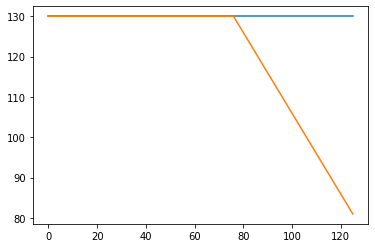

In [344]:
import matplotlib.pyplot as plt

plt.plot(predicted_RUL[16,:])
plt.plot(y_train[16,:])

In [258]:
y_new = model.predict(X_test)


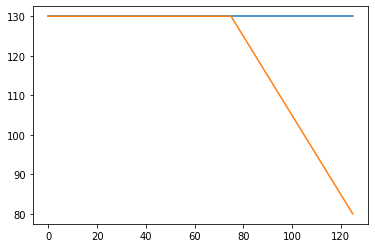

In [345]:
import matplotlib.pyplot as plt
predicted_RUL = np.zeros((146,126))
for i in range(0,72):
  for j in range(0,126):
    predicted_RUL[i,j] = np.argmax(y_new[i,j,:])
plt.plot(predicted_RUL[71])
plt.plot(y_test[71])

In [119]:
from keras.utils.np_utils import to_categorical
RUL_tags_test = to_categorical(y_test,131)
model.evaluate(X_test,RUL_tags_test)

3/3 [==============================] - 1s 17ms/step - loss: 1.2036


1.2035949230194092

In [349]:
#read test
data_valid = pd.read_csv('test.csv',sep=",")

In [121]:
data_valid.head()

,Engine,Cycle,Setting 1,Setting 2,Setting 3,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,Sensor 11,Sensor 12,Sensor 13,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21
0,1,1,0.0016,0.0002,100,518.67,642.88,1587.21,1412.44,14.62,21.61,553.33,2388.12,9042.41,1.30,47.57,521.44,2388.10,8124.04,8.4363,0.03,393.0,2388.0,100.00,38.97,23.3029
1,1,2,24.9993,0.6215,80,462.54,536.45,1262.64,1055.44,7.05,9.02,175.04,1915.12,7983.34,0.94,36.81,164.32,2027.95,7865.20,10.8935,0.02,308.0,1915.0,84.93,14.29,8.6686
2,1,3,0.0004,0.0000,100,518.67,642.65,1589.75,1409.54,14.62,21.61,554.31,2388.18,9037.61,1.30,47.49,521.15,2388.19,8121.12,8.4620,0.03,393.0,2388.0,100.00,38.91,23.2693
3,1,4,10.0034,0.2500,20,489.05,604.44,1499.93,1315.34,10.52,15.49,393.88,2318.94,8761.83,1.26,45.41,371.42,2388.21,8123.53,8.6815,0.03,369.0,2319.0,100.00,28.60,17.0930
4,1,5,0.0024,0.0011,100,518.67,642.74,1585.47,1408.12,14.62,21.61,553.53,2388.13,9041.98,1.30,47.66,520.86,2388.13,8118.30,8.4617,0.03,392.0,2388.0,100.00,38.82,23.3124


In [122]:
data.columns

Index(['Unnamed: 0', 'Engine', 'Cycle', ' Setting 1', 'Setting 2', 'Setting 3',
       'Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5', 'Sensor 6',
       'Sensor 7', 'Sensor 8', 'Sensor 9', 'Sensor 10', 'Sensor 11',
       'Sensor 12', 'Sensor 13', 'Sensor 14', 'Sensor 15', 'Sensor 16',
       'Sensor 17', 'Sensor 18', 'Sensor 19', 'Sensor 20', 'Sensor 21', 'RUL'],
      dtype='object')

In [350]:
#load dataset
from numpy import loadtxt
dataset = data_valid.to_numpy()
X_valid = dataset[:,2:27]


In [351]:
X_valid.shape

(29820, 24)

In [127]:
engine_old = 1
cycle_old = 1
last_cycle = []
for index, row in data.iterrows():
  engine = row['Engine']
  cycle = row['Cycle']
  if engine > engine_old :
    last_cycle.append(cycle_old)
    engine_old = engine
    cycle_old = cycle
  else:
    cycle_old = cycle
last_cycle.append(data['Cycle'].iloc[-1])   

In [128]:
print(min(last_cycle))

128.0


In [129]:
#need to reshape X into 3D: engine x cycle x sensor
#for fist step, keep it symmetrical and use the lowest number of cycles in dataset
#Y then becomes 
X_valid_new=np.empty(shape=(218,126,25))

#i would be number of engines
counter = 0
for i in range(0,218):
  #print('i=',i)
  # j would be number of cycles
  for j in range(0,126):
    #print('j=',j)
    #k would be number of sensors
    for k in range(0,24):
      #print('k=',k)
      #print('counter',counter)
      X_valid_new[i,j,k]=X[counter,k]

    if j == 0:
      counter = counter + (int(last_cycle[i]) - 126) + 1
    else: 
      counter = counter + 1

In [ ]:
print(last_cycle)

[54.0, 157.0, 116.0, 74.0, 218.0, 151.0, 116.0, 287.0, 167.0, 177.0, 69.0, 224.0, 248.0, 93.0, 61.0, 138.0, 95.0, 135.0, 145.0, 145.0, 215.0, 129.0, 144.0, 16.0, 76.0, 79.0, 149.0, 39.0, 117.0, 156.0, 364.0, 79.0, 80.0, 52.0, 60.0, 181.0, 165.0, 89.0, 182.0, 126.0, 112.0, 202.0, 128.0, 150.0, 136.0, 120.0, 117.0, 242.0, 149.0, 179.0, 91.0, 129.0, 167.0, 143.0, 130.0, 152.0, 77.0, 164.0, 58.0, 80.0, 148.0, 163.0, 181.0, 258.0, 55.0, 183.0, 150.0, 93.0, 121.0, 153.0, 154.0, 132.0, 123.0, 56.0, 86.0, 188.0, 203.0, 109.0, 88.0, 73.0, 150.0, 124.0, 108.0, 51.0, 194.0, 87.0, 45.0, 122.0, 189.0, 23.0, 150.0, 72.0, 110.0, 125.0, 256.0, 70.0, 25.0, 209.0, 96.0, 80.0, 187.0, 132.0, 140.0, 127.0, 138.0, 234.0, 178.0, 89.0, 181.0, 138.0, 249.0, 275.0, 136.0, 159.0, 102.0, 221.0, 191.0, 78.0, 148.0, 190.0, 82.0, 177.0, 195.0, 134.0, 75.0, 169.0, 133.0, 115.0, 100.0, 187.0, 26.0, 163.0, 93.0, 280.0, 205.0, 186.0, 108.0, 134.0, 159.0, 154.0, 168.0, 185.0, 48.0, 107.0, 169.0, 44.0, 197.0, 238.0, 204.0

In [ ]:
print(len(last_cycle))

218


In [ ]:
list_of_columns = data.columns

In [ ]:
data.columns

Index(['Engine', 'Cycle', 'Setting 1', 'Setting 2', 'Setting 3', 'Sensor 1',
       'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5', 'Sensor 6', 'Sensor 7',
       'Sensor 8', 'Sensor 9', 'Sensor 10', 'Sensor 11', 'Sensor 12',
       'Sensor 13', 'Sensor 14', 'Sensor 15', 'Sensor 16', 'Sensor 17',
       'Sensor 18', 'Sensor 19', 'Sensor 20', 'Sensor 21'],
      dtype='object')

In [168]:
RUL_tags_valid = model.predict(X_valid_new)



In [169]:
RUL_tags_valid.shape

(218, 126, 131)

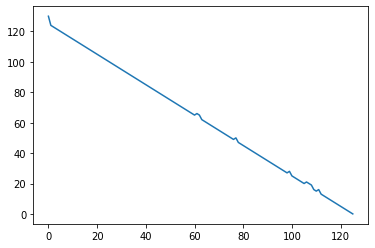

In [170]:
#let's look at the predictions
predicted_RUL = np.zeros((146,126))
for i in range(0,72):
  for j in range(0,126):
    predicted_RUL[i,j] = np.argmax(RUL_tags_valid[i,j,:])


plt.plot(predicted_RUL[25])

In [171]:
#let's get the last elements
last_element = []
for i in range(len(predicted_RUL)):
  ylen = len(predicted_RUL[i])
  #print(ylen)
  y = predicted_RUL[i]
  a = y[ylen-1] 
  #print(a)
  last_element.append(int(a))

In [172]:
print(last_element)

[80, 99, 101, 101, 98, 87, 87, 87, 87, 87, 87, 87, 87, 87, 25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
len(last_element)

218

In [ ]:
print(predictions[216])

In [ ]:
with open('test_rul_averaged.txt', 'w') as filehandle:
    for item in last_element:
        filehandle.write('%s\n' % item)

In [ ]:
#read test
data = pd.read_csv('train_rul.csv',sep=",")

In [ ]:
engine_old = 1
cycle_old = 1
last_cycle = []
for index, row in data.iterrows():
  engine = row['Engine']
  cycle = row['Cycle']
  if engine > engine_old :
    last_cycle.append(cycle_old)
    engine_old = engine
    cycle_old = cycle
  else:
    cycle_old = cycle

In [ ]:
last_cycle.append(data['Cycle'].iloc[-1])